<a href="https://colab.research.google.com/github/nitron-alpha-kplr/DEEP-LEARNING-III/blob/main/AI/CNN_CAT_DOG/CNN_avec_trou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Creation et deploiement d'un classificateur d'images chat-chien à l'aide de TensorFlow et Streamlit**

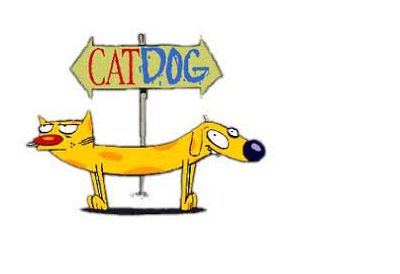

- **This is what we will build at the end :**

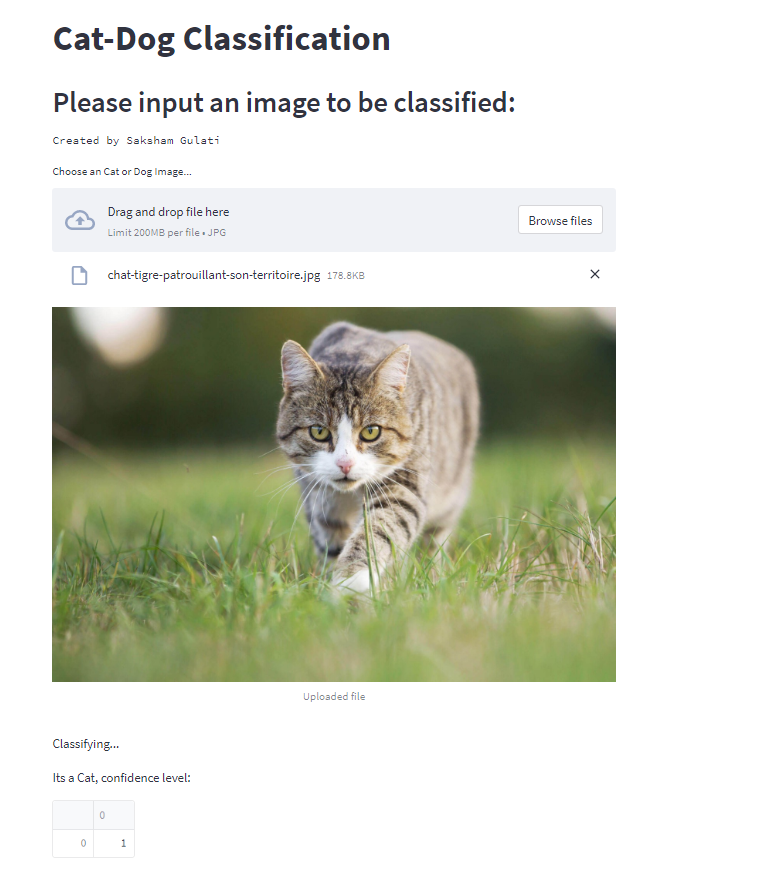

## Importer la data depuis Kaggle


- Tout d'abord, vous devriez aller sur votre compte ou créer votre compte kaggle : https://www.kaggle.com/

- Allez sur votre Account Kaggle


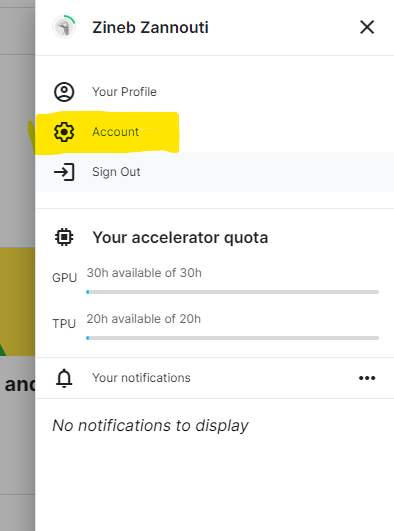

- Trouvez la section API
- Cliquez sur le bouton "Create a new API Token".

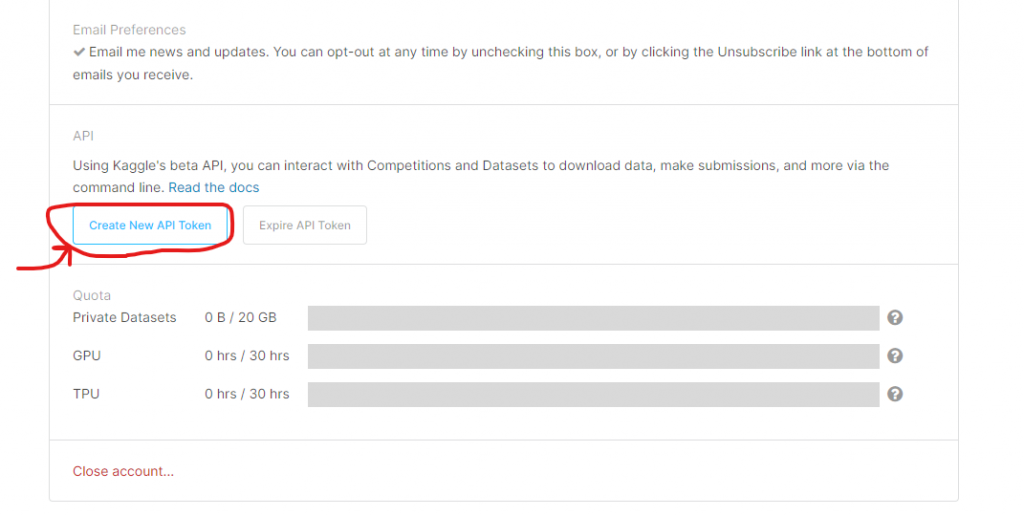

- Et enfin importer Kaggle.json comme fichier ici

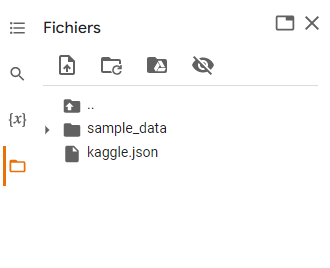

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

 95% 206M/218M [00:00<00:00, 303MB/s]
100% 218M/218M [00:00<00:00, 258MB/s]


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
import PIL
print('Pillow Version:', PIL.__version__)

from PIL import Image

Pillow Version: 7.1.2


In [ ]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

uint8
(499, 421, 3)


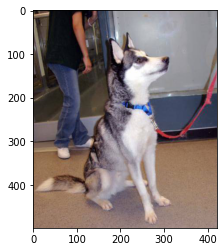

In [ ]:
from matplotlib import image
from matplotlib import pyplot
data = image.imread(r'/content/test_set/test_set/dogs/dog.4001.jpg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

### Typical steps for loading custom dataset for Deep Learning Models
* Open the image file. The format of the file can be JPEG, PNG, BMP, etc.
* Resize the image to match the input size for the Input layer of the Deep Learning model.
* Convert the image pixels to float datatype.
* Normalize the image to have pixel values scaled down between 0 and 1 from 0 to 255.
* Image data for Deep Learning models should be either a numpy array or a tensor object.

In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline

(499, 497, 3)
(500, 382, 3)
(439, 336, 3)
(239, 320, 3)
(333, 499, 3)


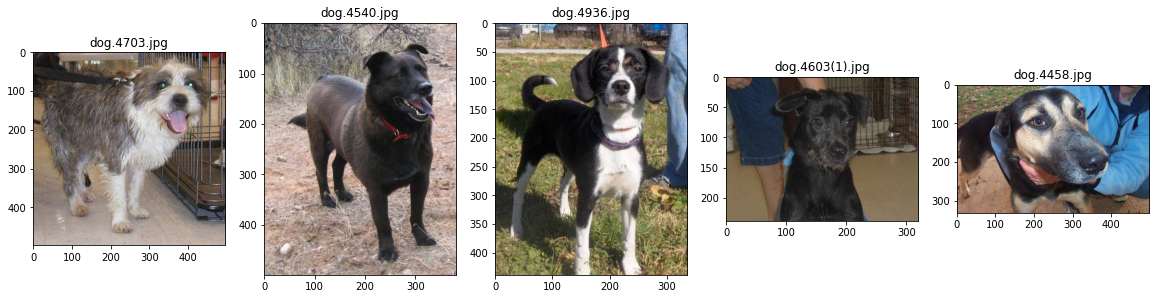

In [ ]:
plt.figure(figsize=(20,20))
test_folder=r'/content/test_set/test_set/dogs'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    print(img.shape)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

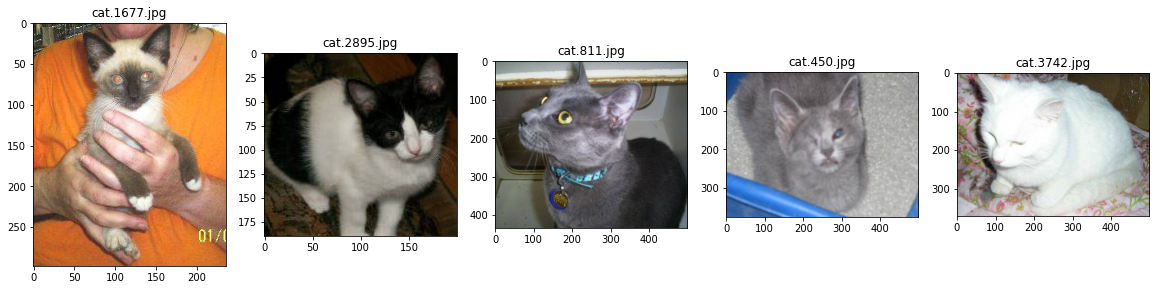

In [ ]:
plt.figure(figsize=(20,20))
test_folder=r'/content/training_set/training_set/cats'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [ ]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'/content/training_set/training_set'

def create_dataset(img_folder):

    img_data_array=[]
    class_name=[]

    for dir1 in os.listdir(img_folder):
        print("Collecting images for: ",dir1)
        for file in os.listdir(os.path.join(img_folder, dir1)):

            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            try:
                image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            except:
                break
            image=np.array(image)
            image = image.astype('float32')
            image /= 255
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(img_folder)

In [ ]:
img_data=np.array(img_data)
class_name=np.array(class_name)
img_data.shape

(5719, 200, 200, 3)

In [ ]:
def dog_cat_mapping(a):
    if a=="dogs":
        return 1
    else:return 0
class_name=list(map(dog_cat_mapping,class_name))
class_name=np.array(class_name)


In [ ]:
input_shape=img_data.shape[1:]
input_shape

(200, 200, 3)

# TO DO
- Charger l'architecture de modèle InceptionResNetV2 pré-entraînée sur ImageNet
- et créer une base de convolution pour l'extraction de fonctionnalités d'images
- "weights='imagenet'" charge les poids pré-entraînés sur l'ensemble de données ImageNet
- "include_top=False" exclut les couches de classification de sortie car nous allons ajouter notre propre couche de sortie personnalisée
- "input_shape=(200,200,3)" spécifie la taille d'entrée de l'image pour le modèle, qui est 200x200 pixels avec 3 canaux de couleur (Rouge, Vert, Bleu)
- Vpici la documentation : https://keras.io/api/applications/inceptionresnetv2/

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2

conv_base=#fill_here

219055592/219055592 [==============================] - 1s 0us/step


In [ ]:
def model():
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
    # to do
    # Instanciation de la classe Sequential pour créer le modèle
    # Voici la documentation : https://keras.io/guides/sequential_model/
    model=#fill_here
    # Ajout de la base de convolution "conv_base" en tant que couche du modèle,
    # avec ses poids gelés pour ne pas être modifiés pendant l'apprentissage
    model.add(conv_base)

    # Aplatissement de la sortie de la base de convolution en un vecteur 1D avec la méthode flatten()
    model.add(#fill_here)
    # Ajout d'une couche Dense de 256 neurones avec une fonction d'activation ReLU
    model.add(#fill_here)
    # Ajout d'une couche Dropout de 0.2 pour éviter le surapprentissage (overfitting) en désactivant aléatoirement certains neurones lors de l'apprentissage
    model.add(#fill_here)
    # Ajout d'une couche de sortie Dense de 1 neurone avec une fonction d'activation sigmoïde pour prédire la probabilité d'appartenance à une classe
    model.add(#fill_here)
    return model
#The Accuracy is: 0.898204

In [ ]:
model=model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 4, 4, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 24576)             0         
                                                                 
 dense (Dense)               (None, 256)               6291712   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 60,628,705
Trainable params: 60,568,161
Non-trainable params: 60,544
_______________________________________

# TO DO

In [ ]:
# Désactivation de la mise à jour des poids de la base de convolution pré-entraînée "conv_base" pendant l'apprentissage
conv_base.trainable=False
# Compilation du modèle avec l'optimiseur Adam, la fonction de perte binary_crossentropy et la métrique accuracy. Voici une doc : https://keras.io/api/models/model_training_apis/
model.#fill_here
# Entraînement du modèle avec les données d'images "img_data" et les classes "class_name" pendant 5 époques
model.fit(x=img_data,y=class_name, epochs=5)

## **Data Ingestion**
now we need to create a function which takes goes into our directory, goes into the folders and transforms our images into a dataframe of required shape and size for keras to work its magic on

In [ ]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'/content/test_set/test_set'


# extract the image array and class name
img_data_test, class_name_test =create_dataset(r'/content/test_set/test_set')

In [ ]:
img_data_test=np.array(img_data_test)
class_name_test=list(map(dog_cat_mapping,class_name_test))
class_name_test=np.array(class_name_test)
preds=model.predict(img_data_test).round().astype(int)
flat_pred = [item for sublist in preds for item in sublist]
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(class_name_test, flat_pred)
print("The Accuracy is: %2f" % accuracy)

In [ ]:
incorrects = np.nonzero(model.predict(img_data_test).round().astype(int).reshape((-1,)) != class_name_test)

In [ ]:
#incorrects- 7,71,84 etc.

plt.imshow(img_data_test[7])

In [ ]:
from keras.models import load_model

model.save('catdog.h5')  # creates a HDF5 file 'my_model.h5'
from keras.models import save_model
#model = save_model(model,'/cat_dog.h5')
IMG_WIDTH=20
IMG_HEIGHT=200
#img_folder='C:\Users\saksh\Downloads\test_set\test_set'


In [ ]:
model.save('./models_catdog', save_format='tf')

In [ ]:
!pip install pyngrok

In [ ]:
!pip install -q streamlit

In [ ]:

%%writefile app.py
import streamlit as st
import tensorflow as tf
import cv2
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

st.title("Cat-Dog Classification")
st.header("Please input an image to be classified:")
st.text("Created by Saksham Gulati")



def teachable_machine_classification(img, weights_file):
    # Load the model
    model = keras.models.load_model(weights_file)

    # Create the array of the right shape to feed into the keras model
    data = np.ndarray(shape=(1, 200, 200, 3), dtype=np.float32)
    image = img
    #image sizing
    size = (200, 200)
    image = ImageOps.fit(image, size, Image.ANTIALIAS)

    #turn the image into a numpy array
    image_array = np.asarray(image)
    # Normalize the image
    normalized_image_array = (image_array.astype(np.float32) / 255)

    # Load the image into the array
    data[0] = normalized_image_array

    # run the inference
    prediction_percentage = model.predict(data)
    prediction=prediction_percentage.round()

    return  prediction,prediction_percentage


uploaded_file = st.file_uploader("Choose an Cat or Dog Image...", type="jpg")

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded file', use_column_width=True)
    st.write("")
    st.write("Classifying...")
    label,perc = teachable_machine_classification(image, 'catdog.h5')
    if label == 1:
        st.write("Its a Dog, confidence level:",perc)
    else:
        st.write("Its a Cat, confidence level:",1-perc)

In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 6.802s
your url is: https://modern-squids-cut.loca.lt
